In [1]:
import networkx as nx
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib.colors as mcolors

In [2]:
def read_file(filename):
    graphs = []
    with open(filename) as f:
        lines = f.readlines()
        for line in lines:
            traj = line.strip().split(" ")
            g = nx.empty_graph(0, nx.DiGraph())
            for i in range(len(traj)-1):
                a = int(traj[i])
                b = int(traj[i+1])
                g.add_edge(a,b)
            graphs.append(g)
    return graphs

In [12]:
orig = read_file("/local/03-03-1-orig.dat")

In [13]:
noisy = read_file("/local/03-03-1-noisy.dat")

In [3]:
def set_coords():
    df_loc = pd.read_csv("/local/APlocations.txt", sep=",")
    x_coord = df_loc['x_coordinate(m)']
    y_coord = df_loc['y_coordinate(m)']
    df_loc.head()
    
    index_to_ap = pd.read_csv("/home/vzakhar1/research/KTH-traces/KTH_data/AP_to_index.txt")
    index_to_ap = index_to_ap.astype({"AP" : "string"})
    df_loc = df_loc.astype({"AP" : "string"})

    df_loc['ix_to_ap'] = df_loc['AP'].apply(lambda x: (index_to_ap.loc[(index_to_ap['AP'] == (x))]).head(1).index.values[0])
    df_loc.tail()
    return df_loc

In [4]:
def draw_no_coords(graphs):
    G = graphs[0]
    nx.set_edge_attributes(G, 'red', 'color')
    for i in range(1, len(graphs)):
        random_color = random.choice(list(mcolors.CSS4_COLORS.keys()))
        curr = graphs[i]
        nx.set_edge_attributes(curr, random_color, 'color')
        #edges = curr.edges()
        G = nx.compose(G, curr)
    plt.figure(figsize=(10, 8))
    edge_colors = nx.get_edge_attributes(G, 'color')
    nx.draw(G, connectionstyle='arc3, rad = 0.1', edge_color=list(edge_colors.values()), with_labels=True)
    return G

In [5]:
def draw_with_coords(G, df_loc):
    positions = {}
    for node in list(G.nodes()):
            if node not in positions.keys():
                x = df_loc.loc[df_loc['ix_to_ap'] == node, 'x_coordinate(m)'].iloc[0]
                y = df_loc.loc[df_loc['ix_to_ap'] == node, 'y_coordinate(m)'].iloc[0]
                coords = [int(x), int(y)]
                positions[node] = coords

    fig, ax = plt.subplots()
    pos = positions
    edge_colors = nx.get_edge_attributes(G, 'color')
    nx.draw(G, pos = pos, ax = ax, connectionstyle='arc3, rad = 0.1', edge_color=list(edge_colors.values()), with_labels=True)
    nx.draw_networkx_labels(G, pos=pos)
    plt.axis("on")
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    plt.show()

## Plotting different result data

In [6]:
df_loc = set_coords()

In [40]:
def big_func(filename_orig, filename_noisy):
    orig = read_file(filename_orig)
    noisy = read_file(filename_noisy)

    #no coords
    G_orig = draw_no_coords(orig)
    G_noisy = draw_no_coords(noisy)
    
    #yes coords
    draw_with_coords(G_orig, df_loc)
    draw_with_coords(G_noisy, df_loc)

### Mornings

### 03-03

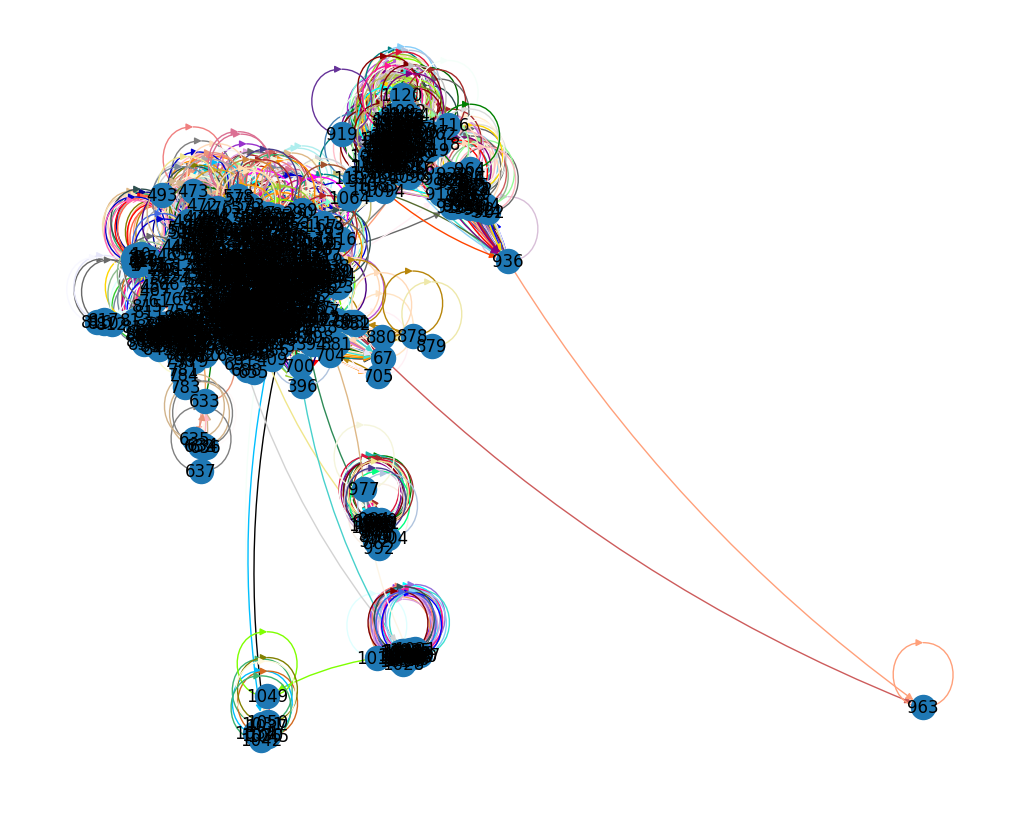

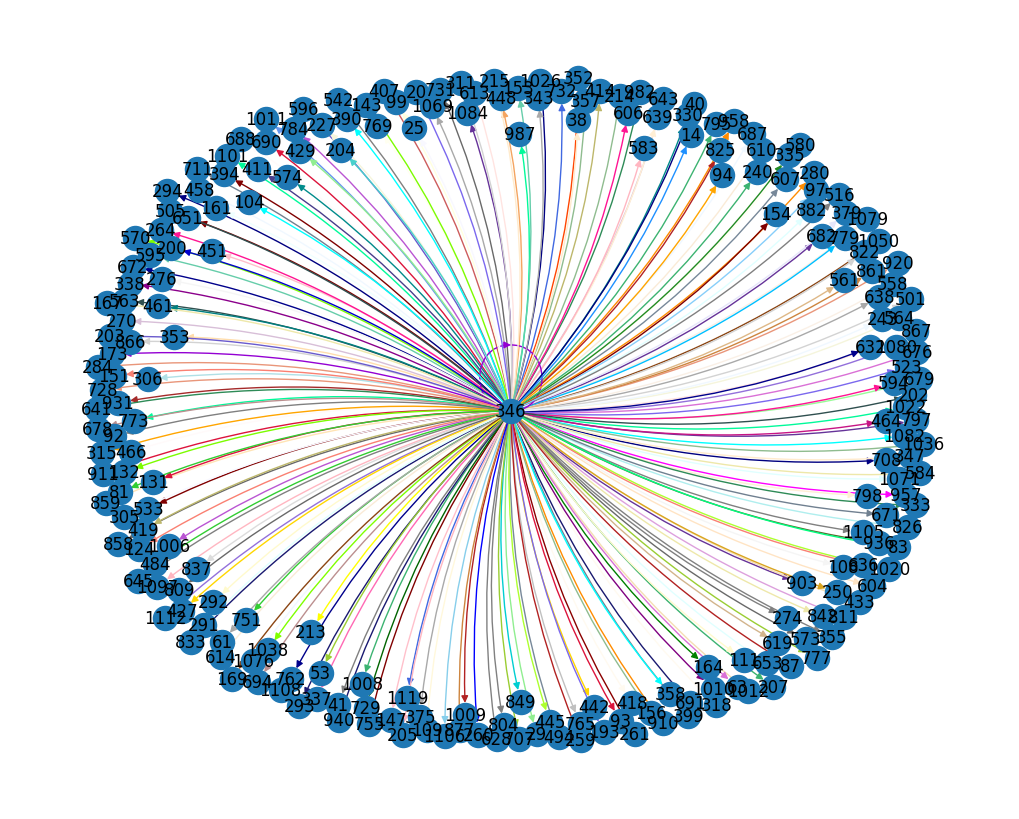

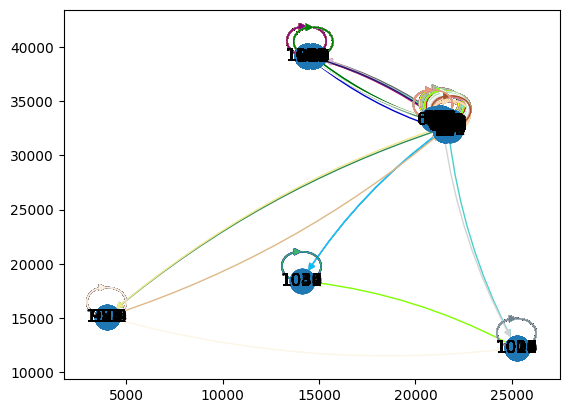

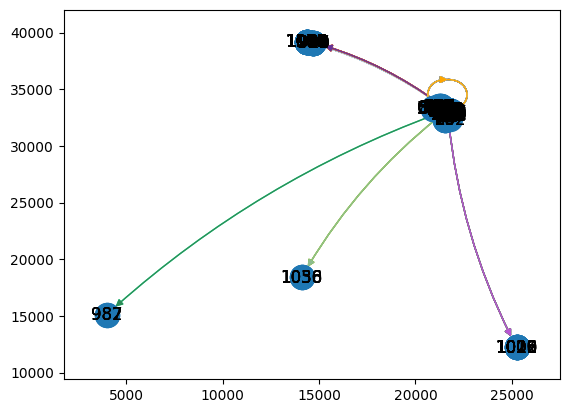

In [31]:
big_func("/local/n_gram_results/03-03-1-orig.dat", "/local/n_gram_results/03-03-1-noisy.dat")

### 04-28

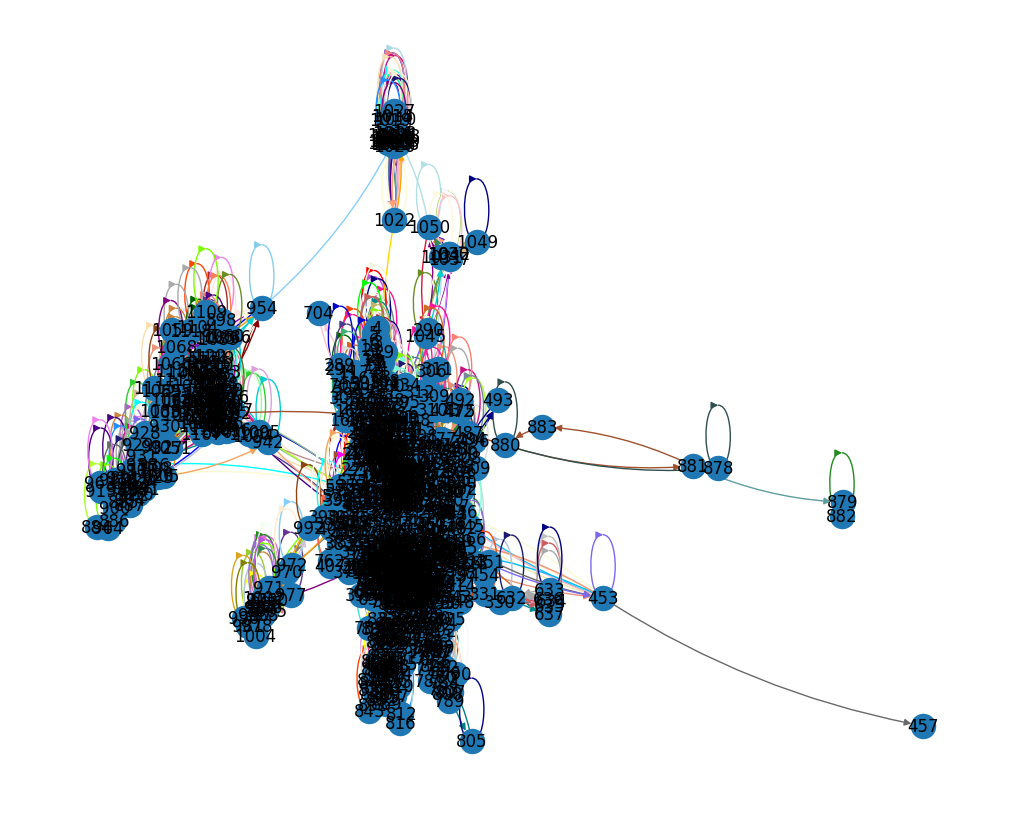

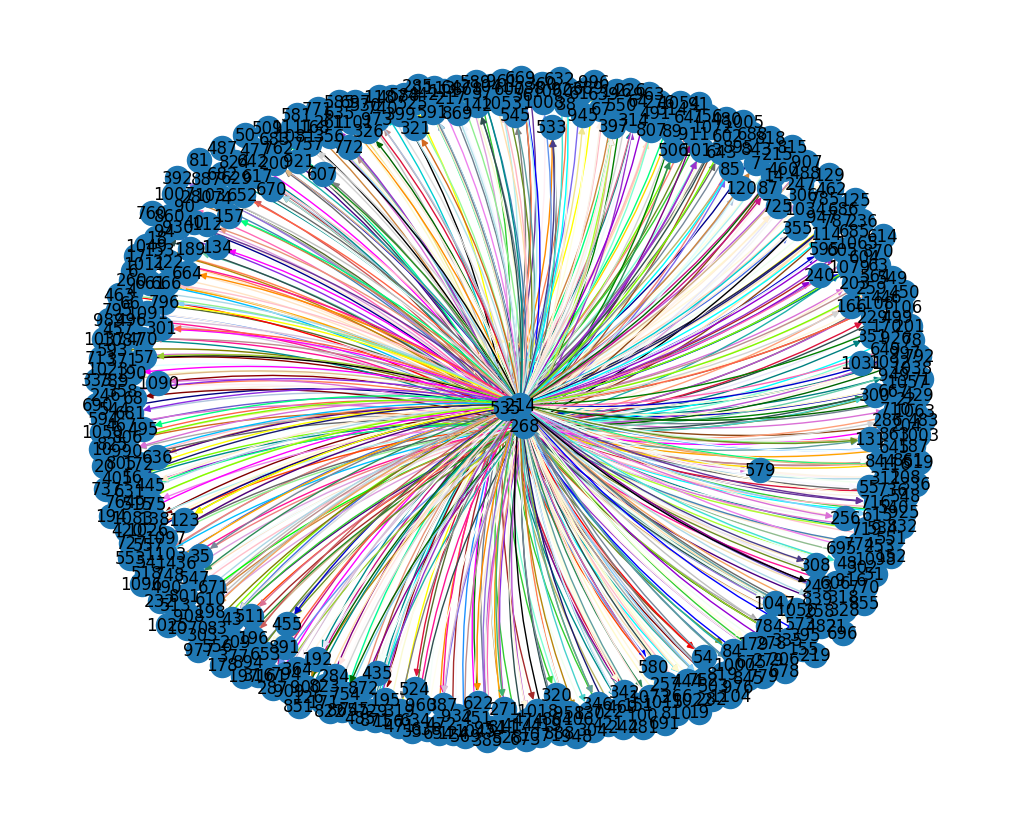

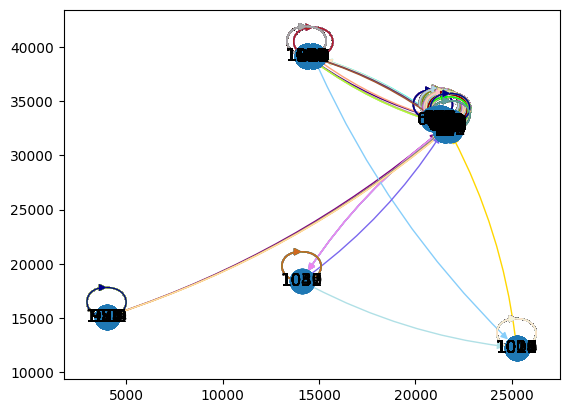

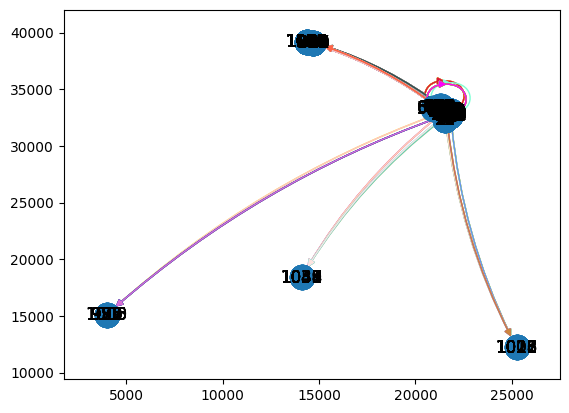

In [32]:
big_func("/local/n_gram_results/04-28-1-orig.dat", "/local/n_gram_results/04-28-1-noisy.dat")

### 09-15

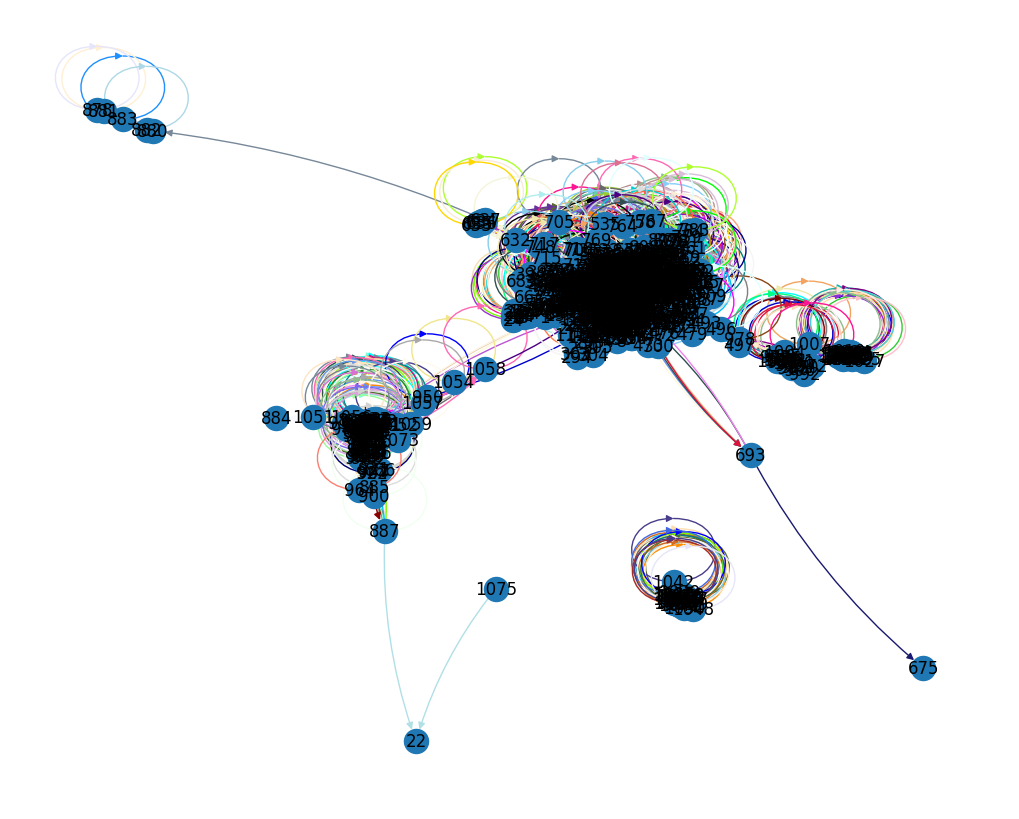

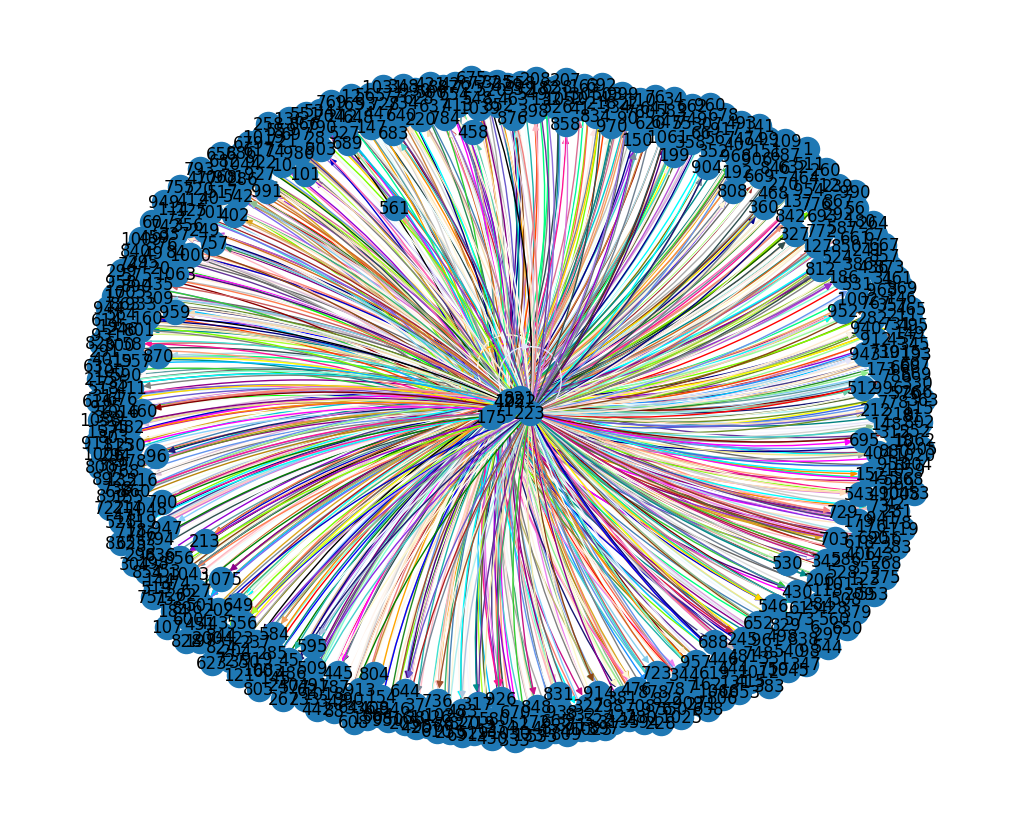

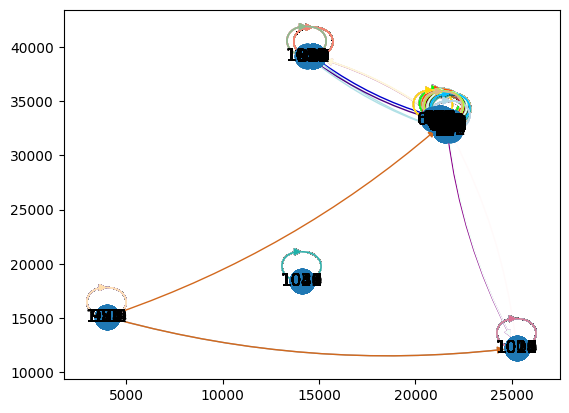

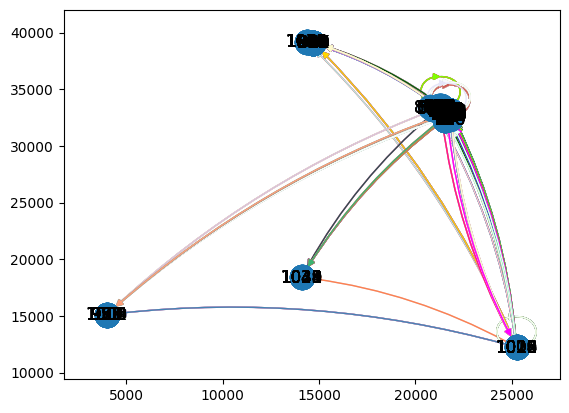

In [33]:
big_func("/local/n_gram_results/09-15-1-orig.dat", "/local/n_gram_results/09-15-1-noisy.dat")

### 12-08

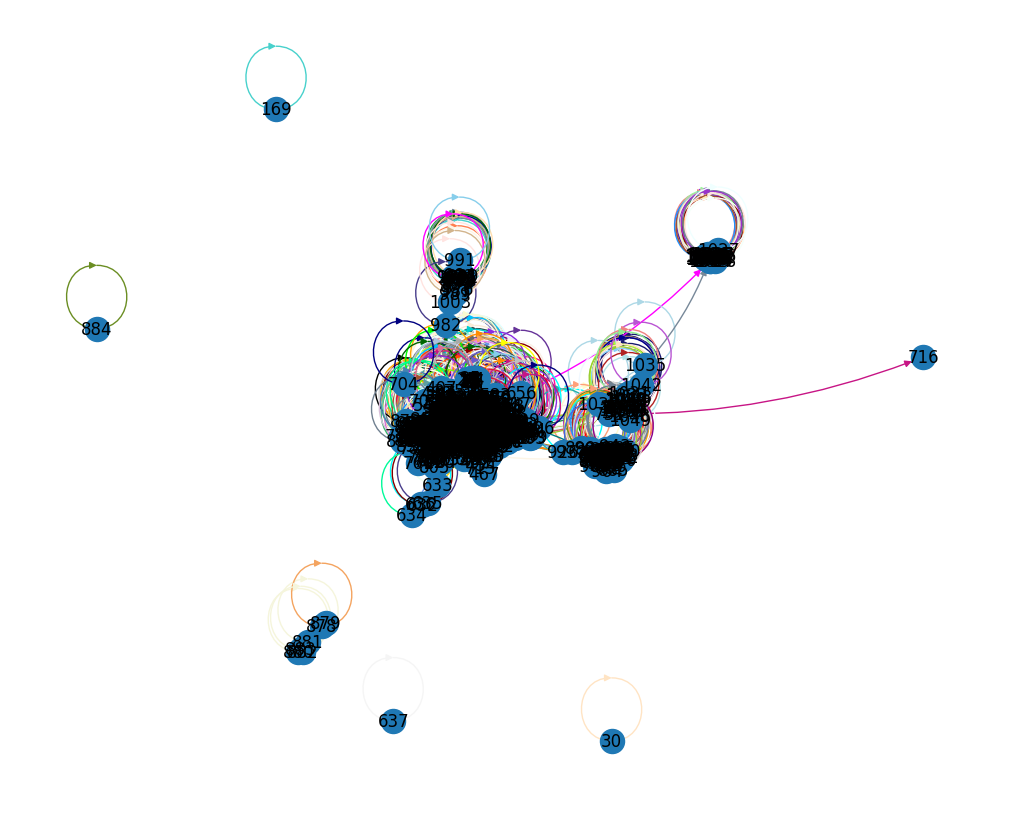

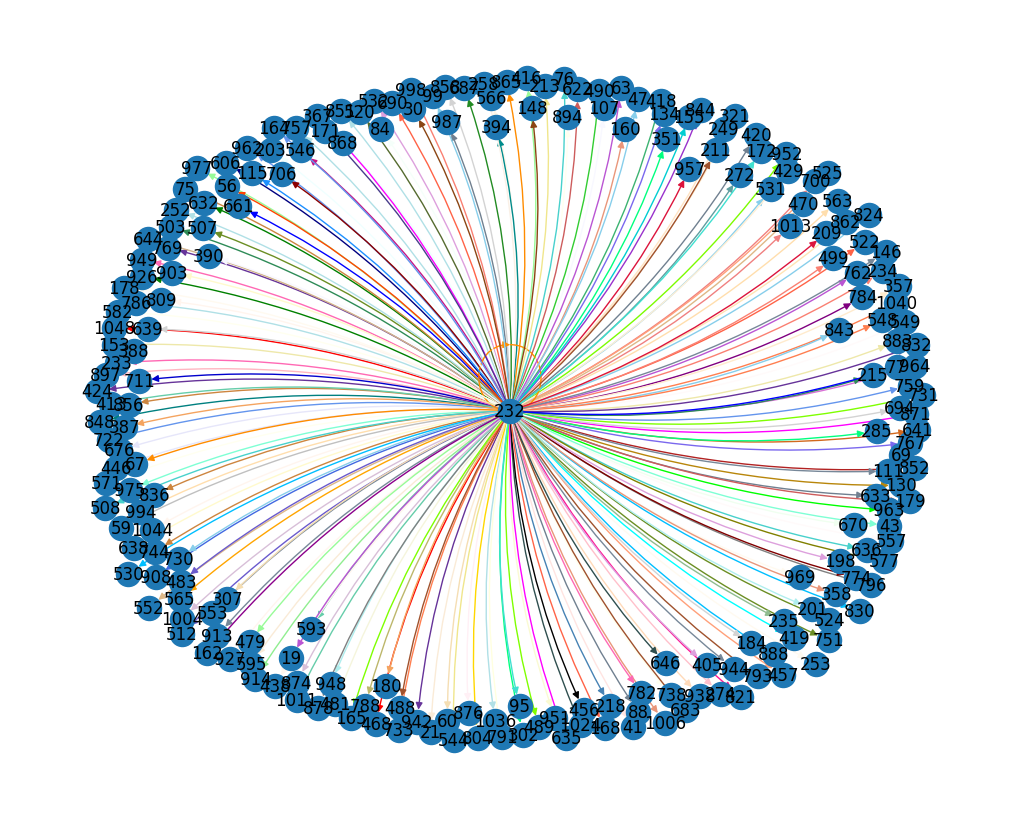

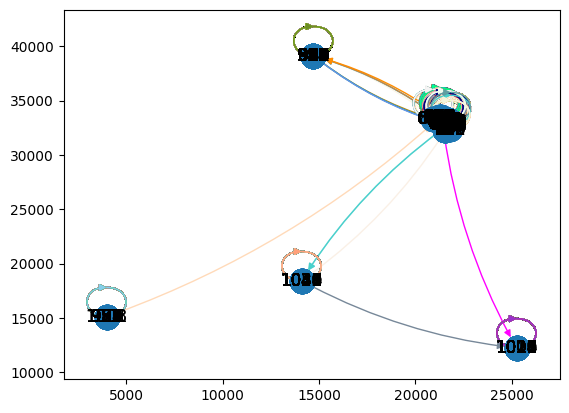

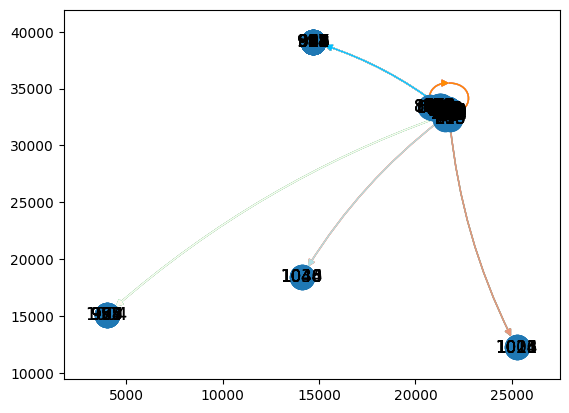

In [34]:
big_func("/local/n_gram_results/12-08-1-orig.dat", "/local/n_gram_results/12-08-1-noisy.dat")

## 03-03 aggr buildings

In [43]:
def set_building_coords():    
    df_loc = pd.read_csv("/local/APlocations.txt", sep=",")
    x_coord = df_loc['x_coordinate(m)']
    y_coord = df_loc['y_coordinate(m)']

    index_to_ap = pd.read_csv("/home/vzakhar1/research/KTH-traces/KTH_data/AP_to_building.txt", sep = ",")
    index_to_ap = index_to_ap.astype({"AP" : "string"})
    index_to_ap.rename(columns = {'BuildingIndex':'Index'}, inplace = True)
    df_loc = df_loc.astype({"AP" : "string"})

    df_loc['bldg_to_ap'] = df_loc['AP'].apply(lambda x: (index_to_ap.loc[(index_to_ap['AP'] == (x))]).values[0][1])
    df_loc.tail()
    return df_loc

In [44]:
def draw_with_coords_bldg(G, df_loc):
    positions = {}
    for node in list(G.nodes()):
            if node not in positions.keys():
                x = df_loc.loc[df_loc['bldg_to_ap'] == node, 'x_coordinate(m)'].iloc[0]
                y = df_loc.loc[df_loc['bldg_to_ap'] == node, 'y_coordinate(m)'].iloc[0]
                coords = [int(x), int(y)]
                positions[node] = coords

    fig, ax = plt.subplots()
    pos = positions
    edge_colors = nx.get_edge_attributes(G, 'color')
    nx.draw(G, pos = pos, ax = ax, connectionstyle='arc3, rad = 0.1', edge_color=list(edge_colors.values()), with_labels=True)
    nx.draw_networkx_labels(G, pos=pos)
    plt.axis("on")
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    plt.show()

In [45]:
df_loc = set_building_coords()

In [49]:
def big_func_build(filename_orig, filename_noisy):
    orig = read_file(filename_orig)
    noisy = read_file(filename_noisy)

    #no coords
    G_orig = draw_no_coords(orig)
    G_noisy = draw_no_coords(noisy)
    
    #yes coords
    draw_with_coords_bldg(G_orig, df_loc)
    draw_with_coords_bldg(G_noisy, df_loc)

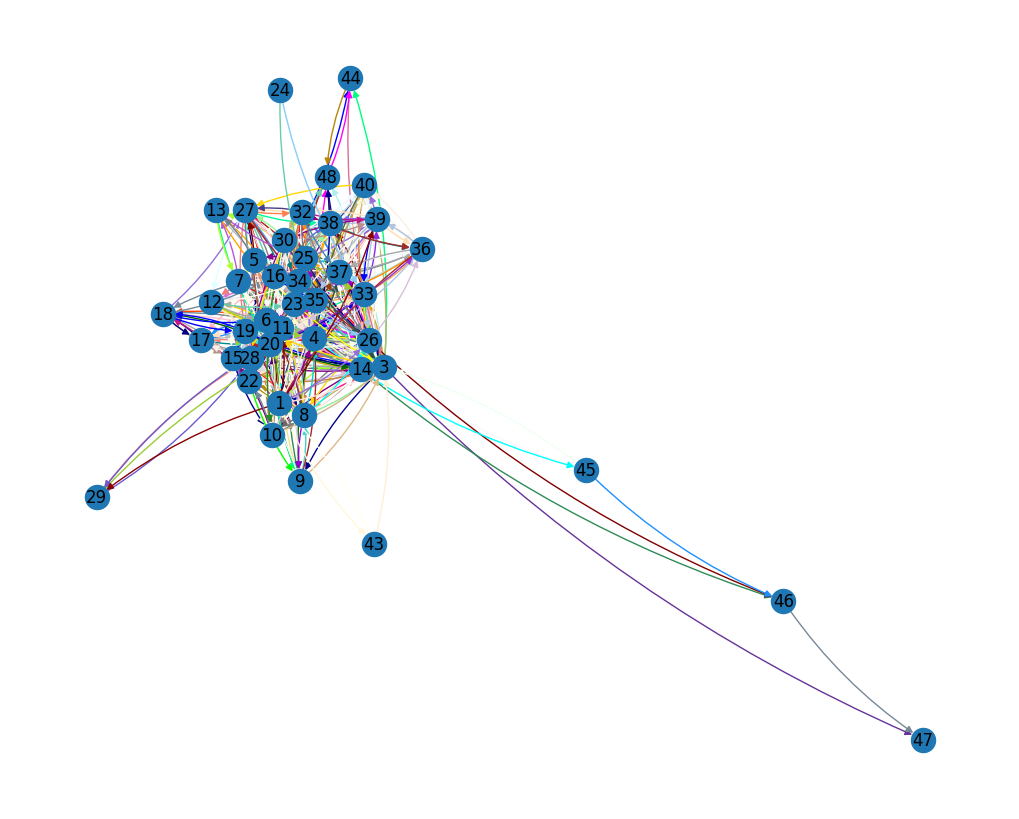

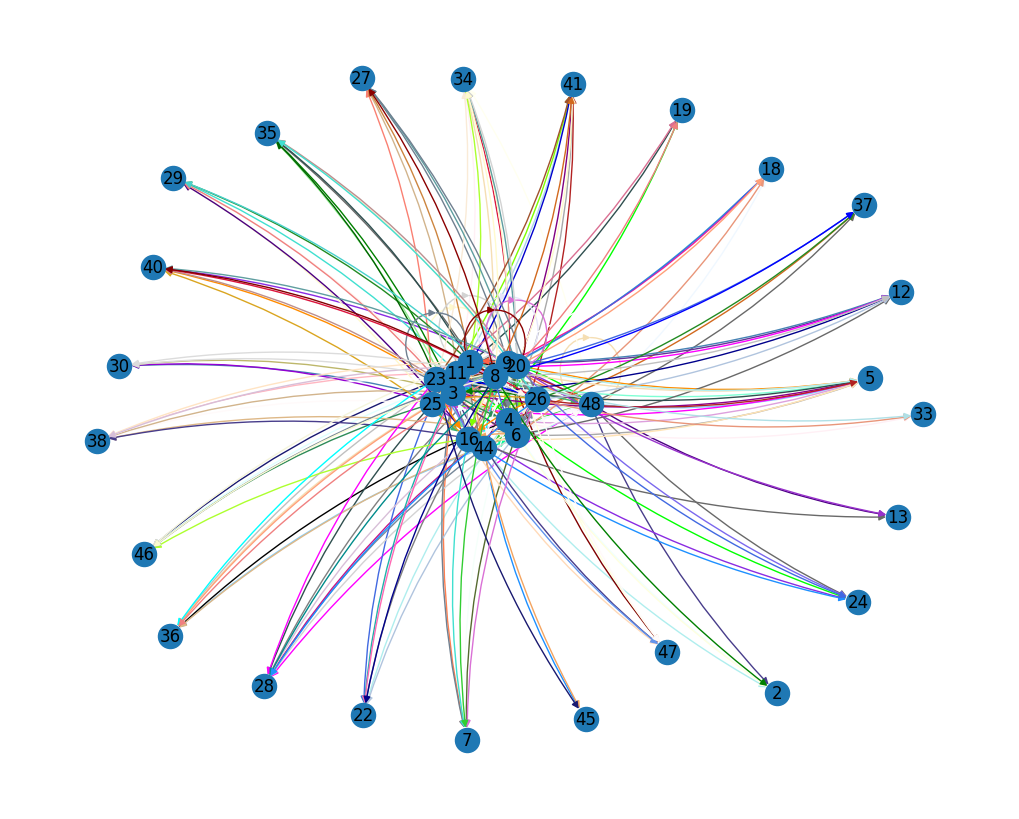

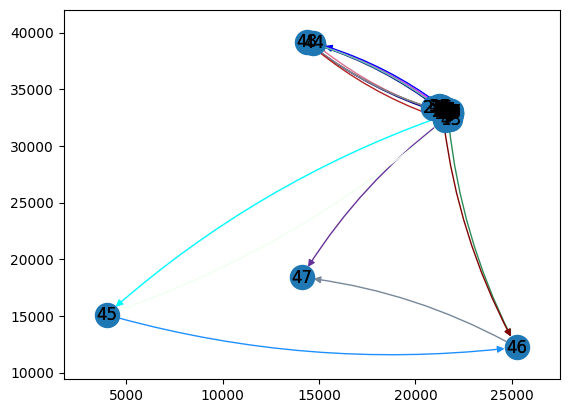

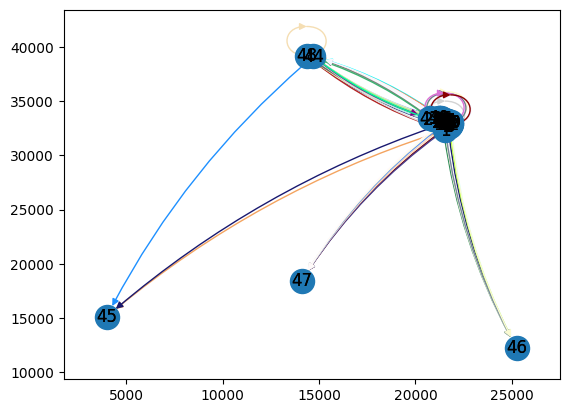

In [50]:
#need to redo locations for buildings and not aps
big_func_build("/local/n_gram_results/03-03-1-building-level-orig.dat", "/local/n_gram_results/03-03-1-building-level-noisy.dat")

## 04-28 dropped aps

IndexError: single positional indexer is out-of-bounds

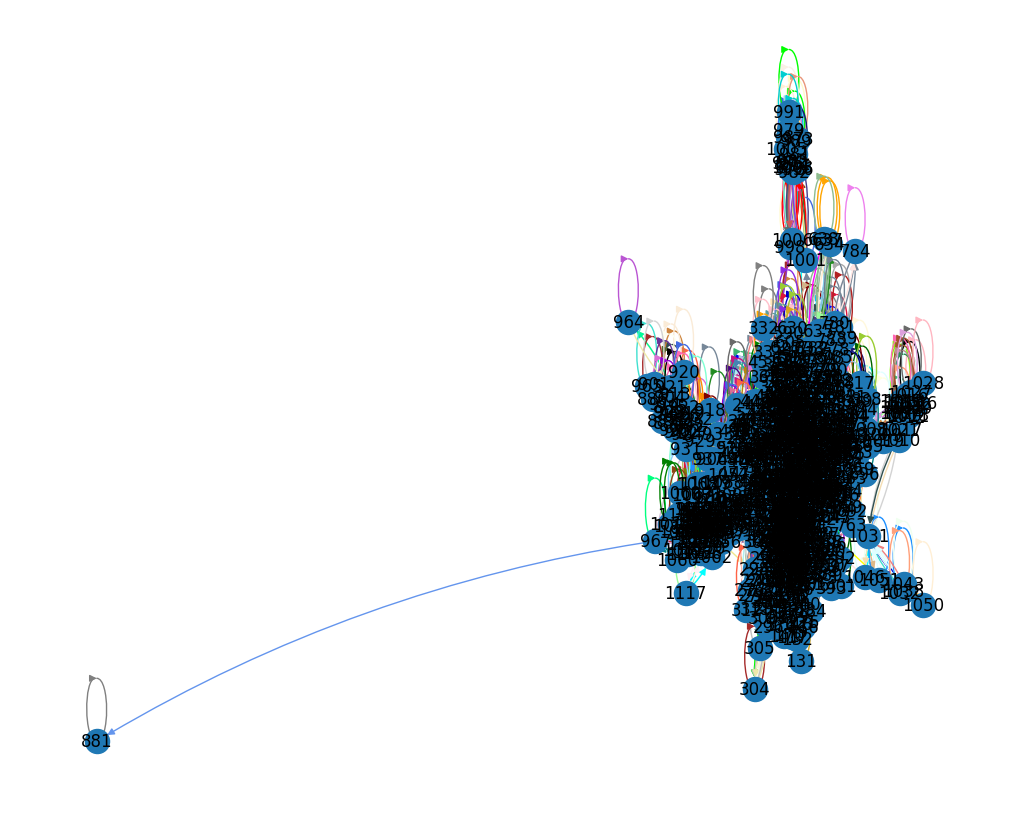

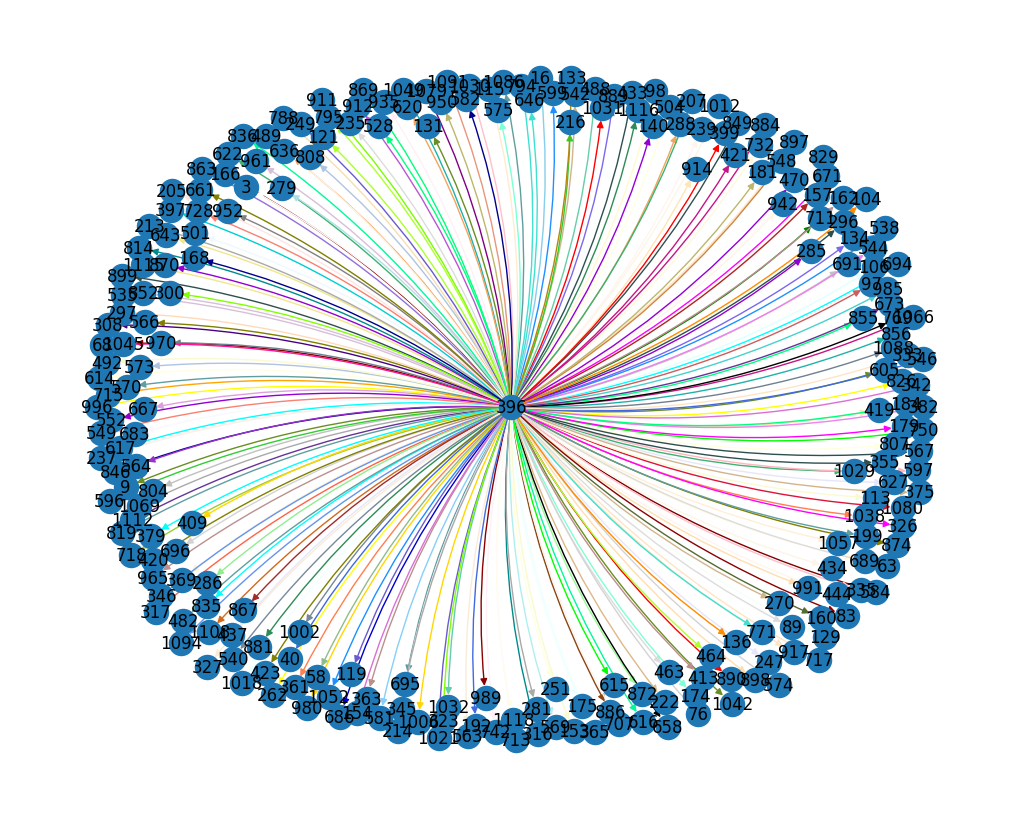

In [10]:
big_func("/local/n_gram_results/04-28-2-threshold-15-dropped-aps-orig.dat", "/local/n_gram_results/04-28-1-threshold-15-dropped-aps-noisy.dat")